# Task 3: Clustering Analysis– Customer Segmentation

In [71]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

### Load the Dataset

In [72]:
# Load the dataset into a DataFrame
df = pd.read_csv('/content/Mall_Customers.csv')

# Preview the data
display(df.head(10))

,CustomerID,Gender,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [73]:
# Dataset Shape
print("Dataset Shape:", df.shape)

# Column Names
print("\nColumn Names:")
print(df.columns.tolist())

# Dataset Index Information
print("\nIndex Info:")
print(df.index)

# Missing Values
print("\nMissing values in each column:\n", df.isnull().sum())

# Duplicate Rows
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Data Types
print("\nData types of columns:\n", df.dtypes)

# Summary Statistics
print("\nSummary statistics:\n", df.describe())

Dataset Shape: (200, 5)

Column Names:
['CustomerID', 'Gender', 'Age', 'Annual_Income_(k$)', 'Spending_Score']

Index Info:
RangeIndex(start=0, stop=200, step=1)

Missing values in each column:
 CustomerID            0
Gender                0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

Number of duplicate rows: 0

Data types of columns:
 CustomerID             int64
Gender                object
Age                    int64
Annual_Income_(k$)     int64
Spending_Score         int64
dtype: object

Summary statistics:
        CustomerID         Age  Annual_Income_(k$)  Spending_Score
count  200.000000  200.000000          200.000000      200.000000
mean   100.500000   38.850000           60.560000       50.200000
std     57.879185   13.969007           26.264721       25.823522
min      1.000000   18.000000           15.000000        1.000000
25%     50.750000   28.750000           41.500000       34.750000
50%    100.500000   36.000000           6

## Data Preprocessing

In [74]:
# Select features for clustering
features = df[['Age', 'Annual_Income_(k$)', 'Spending_Score']]

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
scaled_features = scaler.fit_transform(features)

# Convert back to DataFrame for easier readability
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

# Display first few rows of the scaled data
print("Standardized features:")
print(scaled_df.head())

Standardized features:
        Age  Annual_Income_(k$)  Spending_Score
0 -1.424569           -1.738999       -0.434801
1 -1.281035           -1.738999        1.195704
2 -1.352802           -1.700830       -1.715913
3 -1.137502           -1.700830        1.040418
4 -0.563369           -1.662660       -0.395980


## Clustering

### Elbow Method

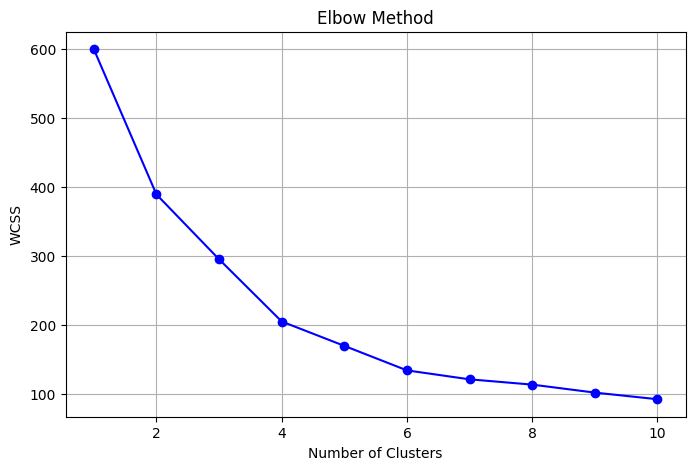

In [75]:
# Calculate WCSS (Within-Cluster Sum of Squares)
wcss = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, wcss, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

### Silhouette Score – Support Elbow Method

In [76]:
# Try different cluster counts and print silhouette scores
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_df)
    score = silhouette_score(scaled_df, labels)
    print(f"Silhouette Score for k={k}: {score:.4f}")

Silhouette Score for k=2: 0.3355
Silhouette Score for k=3: 0.3579
Silhouette Score for k=4: 0.4040
Silhouette Score for k=5: 0.4085
Silhouette Score for k=6: 0.4311


### Apply K-Means Clustering

In [77]:
# Choose the optimal number of clusters from Elbow/Silhouette results
optimal_k = 4  # Replace with your best value after checking the plots

# Apply KMeans
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_df)

# Add cluster labels to original DataFrame
df['Cluster'] = cluster_labels

# Preview the dataset with cluster labels
print("Dataset with assigned clusters:")
display(df.head())

Dataset with assigned clusters:


,CustomerID,Gender,Age,Annual_Income_(k$),Spending_Score,Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


## Visualization

### 2D Scatter Plot using PCA

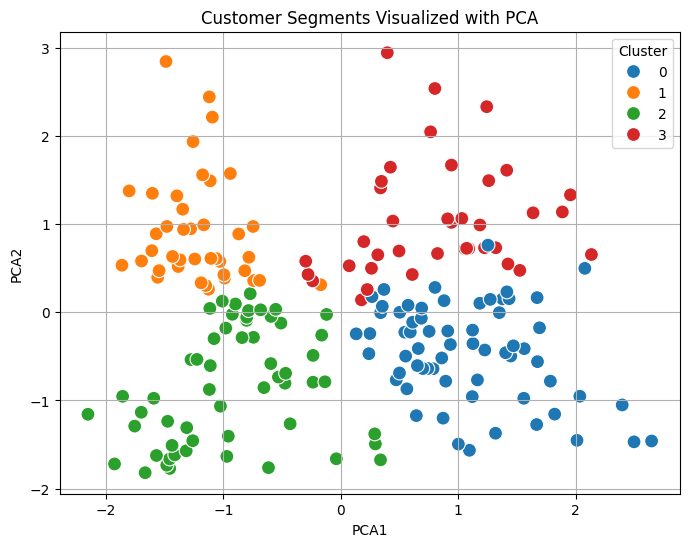

In [78]:
# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_df)

# Add PCA results to DataFrame
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

# Plot the clusters in 2D space
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='tab10', s=100)
plt.title('Customer Segments Visualized with PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.grid(True)
plt.show()

### Pair Plot of Original Features Colored by Cluster

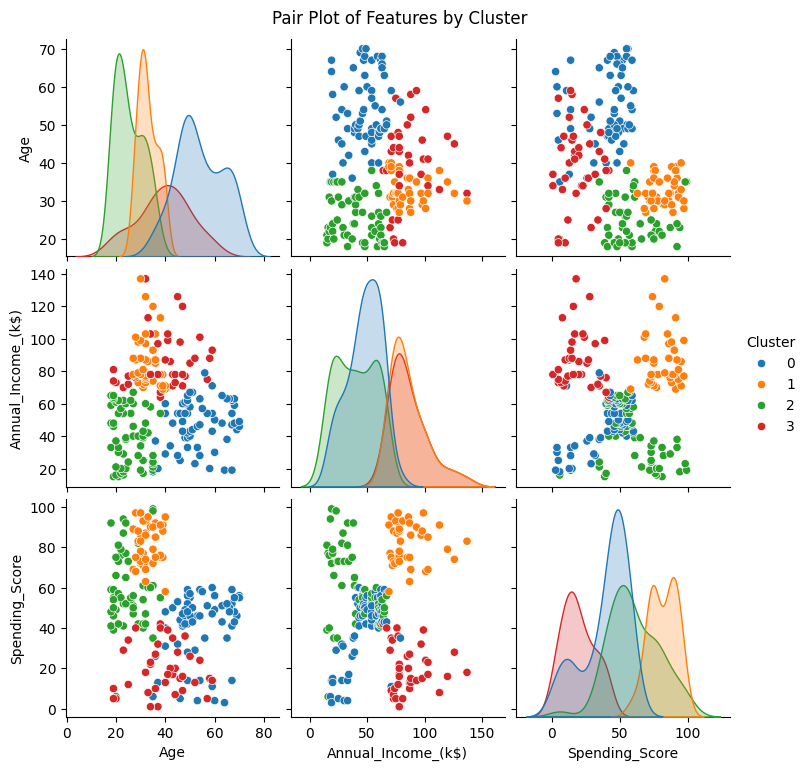

In [79]:
# Pair Plot of Features by Cluster
sns.pairplot(df[['Age', 'Annual_Income_(k$)', 'Spending_Score', 'Cluster']],
             hue='Cluster', palette='tab10')
plt.suptitle("Pair Plot of Features by Cluster", y=1.02)
plt.show()

### Centroid Visualization in PCA space

In [80]:
centroids = kmeans.cluster_centers_
centroids_original = scaler.inverse_transform(centroids)
print("cluster centroids (original scale):\n", centroids_original)

cluster centroids (original scale):
 [[53.98461538 47.70769231 39.96923077]
 [32.875      86.1        81.525     ]
 [25.43859649 40.         60.29824561]
 [39.36842105 86.5        19.57894737]]


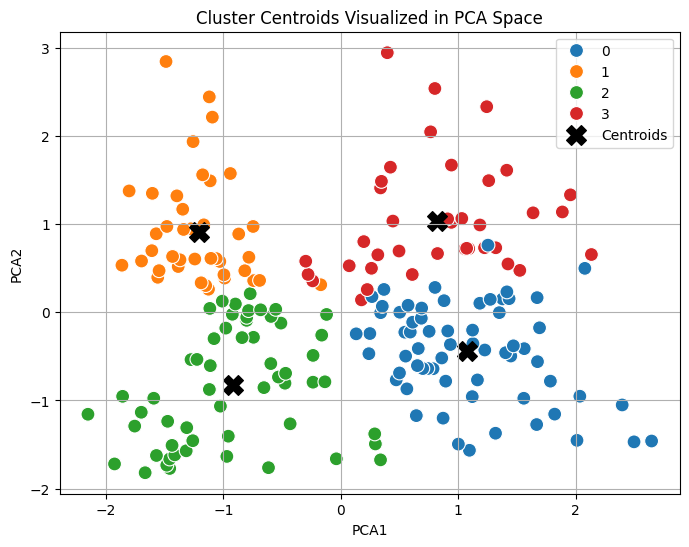

In [81]:
# Transform centroids to PCA space
centroids_pca = pca.transform(kmeans.cluster_centers_)

# Plot with centroids
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='tab10', s=100)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            c='black', s=200, marker='X', label='Centroids')
plt.title('Cluster Centroids Visualized in PCA Space')
plt.legend()
plt.grid(True)
plt.show()

### Heatmap

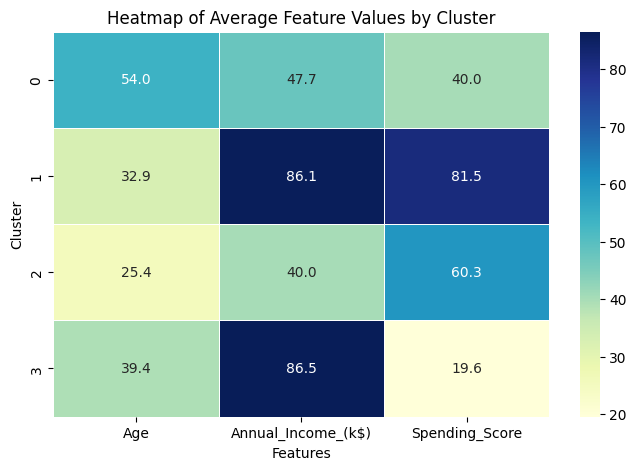

In [82]:
# Group data by Cluster and calculate mean of each feature
cluster_means = df.groupby('Cluster')[['Age', 'Annual_Income_(k$)', 'Spending_Score']].mean()

# Plot the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(cluster_means, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5)
plt.title("Heatmap of Average Feature Values by Cluster")
plt.xlabel("Features")
plt.ylabel("Cluster")
plt.show()

In [83]:
# Save the Clustered Dataset
df.to_csv("clustered_customer_data.csv", index=False)
print("Clustered dataset saved as 'clustered_customer_data.csv'")

Clustered dataset saved as 'clustered_customer_data.csv'


## Expected Outcomes

###  **Expected Outcomes for Task 3: Customer Segmentation**

1. **Segment Customers into Meaningful Groups:**

   Customers were successfully clustered based on their age, annual income, and spending score. These segments represent distinct groups such as high-spenders, budget shoppers, and high-income low-spenders, enabling better business understanding of diverse customer types.

2. **Identify Key Patterns and Trends:**

   Analysis revealed specific behavioral patterns within clusters. For example, younger customers tend to spend more, while certain high-income groups are conservative in spending. These insights allow businesses to focus on behavior-driven decision-making.

3. **Visual Understanding of Customer Groups:**

   Using PCA scatter plots, pair plots, and heatmaps, the customer clusters were visualized clearly. These visuals make it easy to communicate insights to stakeholders and guide strategic actions.

4. **Facilitate Targeted Marketing and Strategy:**
   The segmentation enables precise marketing campaigns. Businesses can now:

   - Target premium products to high-spending clusters.
   - Create loyalty programs for high-income cautious spenders.
   - Offer budget deals to low-income groups.
     This ensures efficient resource allocation and better ROI on marketing efforts.